In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
from waveimage import WaveImage, calc_dim, calc_U, mnist_reshape_32
from scipy.stats import multivariate_normal
import math, sys, os, pickle
from record import Record, affiche_records
import time

In [3]:
#del dict_records

nom_fic = 'backbone-CNN-parts-base'; liste_thresholds =(1, 3e-1, 1e-1, 3e-2, 1e-2)
#nom_fic = 'base-base'; liste_thresholds = (1e-1, 1e-2, 1e-3, 1e-4, 1e-5)
#nom_fic = 'base-naive-test-1000-IG-test2'; liste_thresholds = (1e-1, 1e-2, 1e-3, 1e-4, 1e-5)
#nom_fic = 'base-naive-test-1000'; liste_thresholds = (1e-1, 1e-2, 1e-3, 1e-4, 1e-5)



In [4]:
#dict_records = np.load('mnist-waveimage-records-FEP-dual-full-limit.npy').tolist()
dict_records = np.load('mnist-waveimage-records-H0_init-'+nom_fic+'.npy').tolist()
dict_records_bis = np.load('mnist-waveimage-records-H0_init-'+nom_fic+'-10000-IG-test-2.npy').tolist()
for k in dict_records_bis:
    dict_records[k] = {}
    for k2 in dict_records_bis[k]:
        dict_records[k][k2]  = dict_records_bis[k][k2]
#dict_records = np.load('mnist-waveimage-records-FEP-dual-full-H0_init-naive-bayes.npy').tolist()
#dict_records = np.load('tmp.npy').tolist() # +++
#dict_records = np.load('data/mnist-waveimage-FCNN-records-predictive-1e-05.npy').tolist()
#dict_records = np.load('mnist-waveimage-CNN-backbone-records-predictive.npy').tolist()
#dict_records = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP-dual-H0_init.npy').tolist()
'''dict_records = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts.npy').tolist()
dict_records_bis = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-saliency.npy').tolist()
dict_records_bis = np.load('mnist-waveimage-records-FEP-dual.npy').tolist()
for k in dict_records_bis:
    dict_records[k] = {}
    for k2 in dict_records_bis[k]:
        dict_records[k][k2]  = dict_records_bis[k][k2]
dict_records_ter = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-generic-saliency.npy').tolist()
for k in dict_records_ter:
    dict_records[k] = {}
    for k2 in dict_records_ter[k]:
        dict_records[k][k2]  = dict_records_ter[k][k2]
dict_records_quad = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP-full-dual.npy').tolist()
for k in dict_records_quad:
    dict_records[k] = {}
    for k2 in dict_records_quad[k]:
        dict_records[k][k2]  = dict_records_quad[k][k2]
dict_records_quint = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP-dual.npy').tolist()
for k in dict_records_quint:
    dict_records[k] = {}
    for k2 in dict_records_quint[k]:
        dict_records[k][k2]  = dict_records_quint[k][k2]'''


"dict_records = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts.npy').tolist()\ndict_records_bis = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-saliency.npy').tolist()\ndict_records_bis = np.load('mnist-waveimage-records-FEP-dual.npy').tolist()\nfor k in dict_records_bis:\n    dict_records[k] = {}\n    for k2 in dict_records_bis[k]:\n        dict_records[k][k2]  = dict_records_bis[k][k2]\ndict_records_ter = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-generic-saliency.npy').tolist()\nfor k in dict_records_ter:\n    dict_records[k] = {}\n    for k2 in dict_records_ter[k]:\n        dict_records[k][k2]  = dict_records_ter[k][k2]\ndict_records_quad = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP-full-dual.npy').tolist()\nfor k in dict_records_quad:\n    dict_records[k] = {}\n    for k2 in dict_records_quad[k]:\n        dict_records[k][k2]  = dict_records_quad[k][k2]\ndict_records_quint = np.load('mnist-waveimage-CNN-backbone-records-rnd-parts-FEP

In [5]:
liste_thresholds

(0.1, 0.01, 0.001, 0.0001, 1e-05)

In [50]:
'mnist-waveimage-records-H0_init-'+nom_fic+'.npy'

'mnist-waveimage-records-H0_init-base-naive-test-1000.npy'

In [5]:
NB_CLASSES = 10
NB_TRIALS = 1000

In [6]:
liste_pol  = (\
            'smooth-predictive-IG',  
            'smooth-predictive-Info-Gain', 
            'smooth-predictive-IG-post', 'smooth-predictive-Infomax', \
            'smooth-predictive-Innovation', 'smooth-predictive-Conservation',  \
            'random',\
            'saliency-based', 'generic-saliency-based',  \
            #'full', \
            'sharp-predictive-Info-Gain', 'sharp-predictive-Infomax', \
            'sharp-predictive-Innovation', 'sharp-predictive-Conservation', 'sharp-predictive-IG-post',\
             )



liste_lab  = (\
            'Compressing Improvement',
            'Local Consistency', 
            'Posterior Consistency', 'Infomax', \
            'Salience', 'ELBO',  \
            'Random',\
            'Pre-processed trajectories', 'Generic trajectory',  \
            #'full', \
            'sharp-predictive-Info-Gain', 'sharp-predictive-Infomax', \
            'sharp-predictive-Innovation', 'sharp-predictive-Conservation', 'sharp-predictive-IG-post',\
             )

liste_col = ['b', 'b--', 'b:', 'g', 'r','m','y:','y','y--', 'b:', 'g:', 'r:','m:','k:']

liste_dot = ['d', 'd', 'd', '^', 'o','s','x','v', 'v','b:', 'g:', 'r:','m:','k:']


'''liste_pol  = (\
            #'smooth-predictive-IG',  
            'smooth-predictive-IG',\
            'smooth-predictive-Info-Gain', \
            'sharp-predictive-Info-Gain',\
            'saliency-based', 'generic-saliency-based',  \
            'random')

liste_lab  = (\
            #'Coding Improvement',
            'Coding Improvement', \
            '(smooth) Local Consistency', \
            '(sharp) Local Consistency', \
            'Pre-processed trajectories', 'Generic trajectory',  \
            'Random',\
             )

liste_col = ['b', 'b--', 'b:', 'g', 'g:','y:']

liste_dot = ['d', 'd', 'd', 'v', 'v','^']
'''

"liste_pol  = (            #'smooth-predictive-IG',  \n            'smooth-predictive-IG',            'smooth-predictive-Info-Gain',             'sharp-predictive-Info-Gain',            'saliency-based', 'generic-saliency-based',              'random')\n\nliste_lab  = (            #'Coding Improvement',\n            'Coding Improvement',             '(smooth) Local Consistency',             '(sharp) Local Consistency',             'Pre-processed trajectories', 'Generic trajectory',              'Random',             )\n\nliste_col = ['b', 'b--', 'b:', 'g', 'g:','y:']\n\nliste_dot = ['d', 'd', 'd', 'v', 'v','^']\n"

In [7]:
liste_NB_TRIALS = []
for z in range(NB_CLASSES):
    liste_NB_TRIALS += [NB_TRIALS] #[len(Data_test[z][0][(0,0)])]

mem_classif_rate = {}
mem_mem_saccades = {}
mem_mem_compression_rate = {}




Policy : smooth-predictive-IG
Threshold : 1
classif rate : 87.8
nb_saccades : 1.1866
nb_coeffs : 20.1534
compression rate : 97.4294132653
final posterior : 0.890314
final entropy : 0.332428


Policy : smooth-predictive-IG
Threshold : 0.3
classif rate : 96.07
nb_saccades : 2.1737
nb_coeffs : 28.9917
compression rate : 96.3020790816
final posterior : 0.983262
final entropy : 0.0836527


Policy : smooth-predictive-IG
Threshold : 0.1
classif rate : 97.74
nb_saccades : 3.865
nb_coeffs : 38.6514
compression rate : 95.0699744898
final posterior : 0.995149
final entropy : 0.0294339


Policy : smooth-predictive-IG
Threshold : 0.03
classif rate : 98.42
nb_saccades : 6.4342
nb_coeffs : 51.6318
compression rate : 93.4143112245
final posterior : 0.99796
final entropy : 0.0111675


Policy : smooth-predictive-IG
Threshold : 0.01
classif rate : 98.8
nb_saccades : 9.9976
nb_coeffs : 67.86
compression rate : 91.3443877551
final posterior : 0.998238
final entropy : 0.00666371


Policy : smooth-predicti

/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)




Policy : smooth-predictive-Innovation
Threshold : 0.3
classif rate : 96.81
nb_saccades : 2.1404
nb_coeffs : 29.7264
compression rate : 96.2083673469
final posterior : 0.983366
final entropy : 0.0840638


Policy : smooth-predictive-Innovation
Threshold : 0.1
classif rate : 98.34
nb_saccades : 3.5734
nb_coeffs : 39.4608
compression rate : 94.9667346939
final posterior : 0.994981
final entropy : 0.0298435


Policy : smooth-predictive-Innovation
Threshold : 0.03
classif rate : 98.77
nb_saccades : 5.6397
nb_coeffs : 52.0332
compression rate : 93.3631122449
final posterior : 0.997699
final entropy : 0.0117499


Policy : smooth-predictive-Innovation
Threshold : 0.01
classif rate : 99.0
nb_saccades : 8.1136
nb_coeffs : 65.685
compression rate : 91.6218112245
final posterior : 0.997993
final entropy : 0.00731219


Policy : smooth-predictive-Conservation
Threshold : 1
classif rate : 88.05
nb_saccades : 1.1753
nb_coeffs : 20.0763
compression rate : 97.439247449
final posterior : 0.891727
final 



Policy : sharp-predictive-Conservation
Threshold : 0.03
classif rate : 98.58
nb_saccades : 4.9913
nb_coeffs : 45.6255
compression rate : 94.1804209184
final posterior : 0.998228
final entropy : 0.0101951


Policy : sharp-predictive-Conservation
Threshold : 0.01
classif rate : 98.84
nb_saccades : 7.2654
nb_coeffs : 57.1227
compression rate : 92.7139413265
final posterior : 0.998553
final entropy : 0.00586157


Policy : sharp-predictive-IG-post
Threshold : 1
classif rate : 87.92
nb_saccades : 1.1871
nb_coeffs : 20.1801
compression rate : 97.4260076531
final posterior : 0.89083
final entropy : 0.331415


Policy : sharp-predictive-IG-post
Threshold : 0.3
classif rate : 96.27
nb_saccades : 2.0947
nb_coeffs : 28.659
compression rate : 96.3445153061
final posterior : 0.983596
final entropy : 0.0823868


Policy : sharp-predictive-IG-post
Threshold : 0.1
classif rate : 97.65
nb_saccades : 3.6025
nb_coeffs : 37.5936
compression rate : 95.2048979592
final posterior : 0.995116
final entropy : 0.

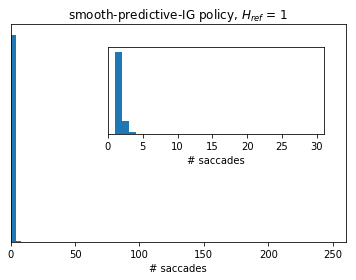

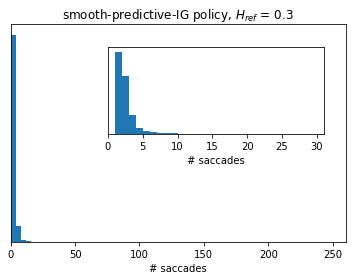

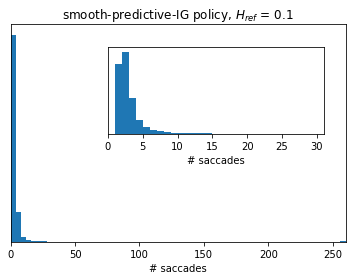

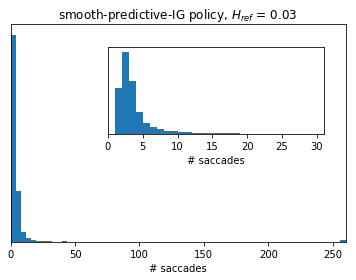

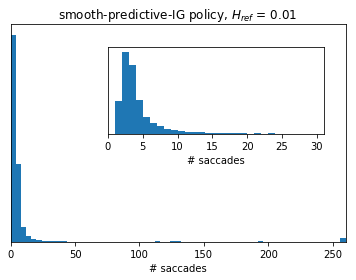

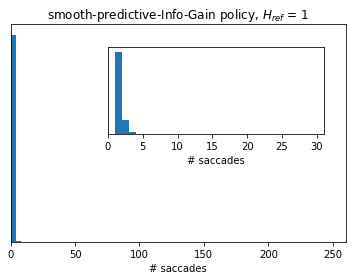

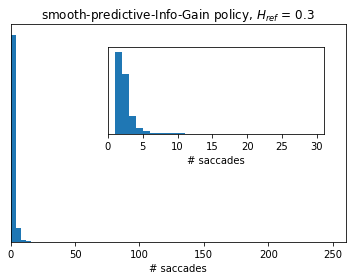

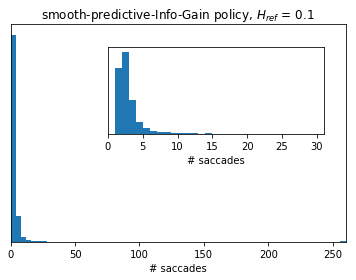

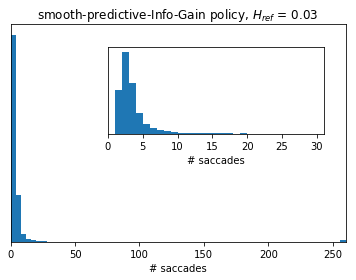

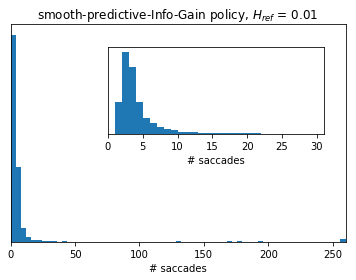

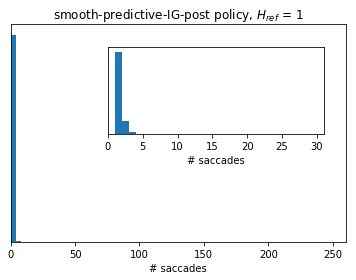

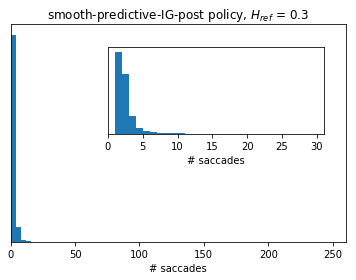

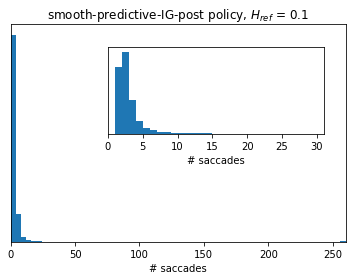

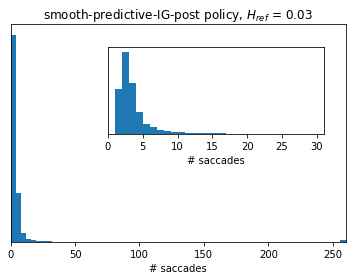

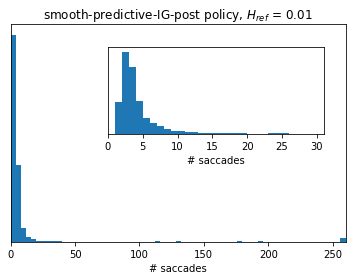

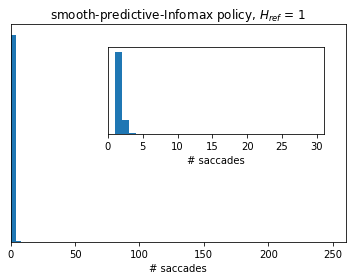

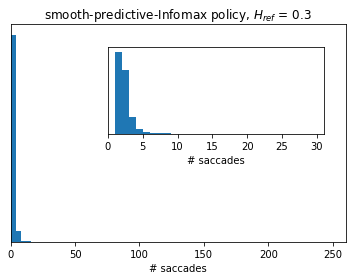

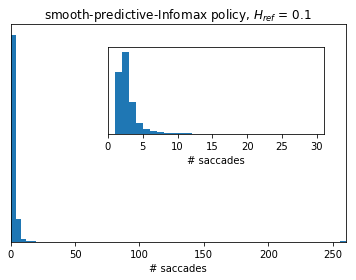

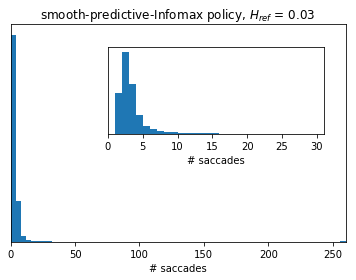

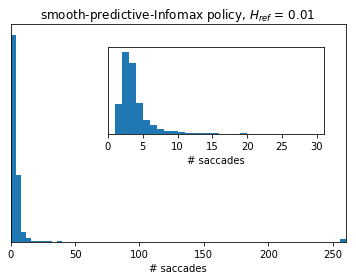

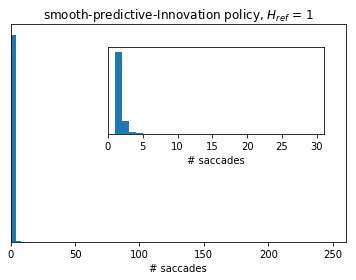

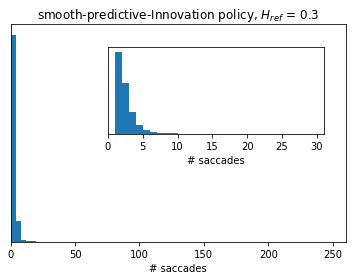

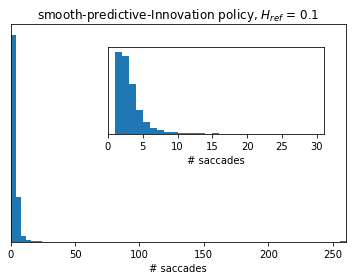

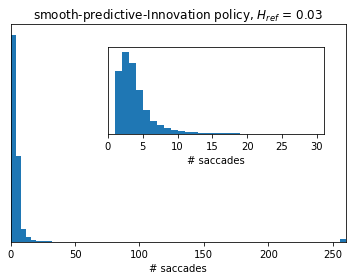

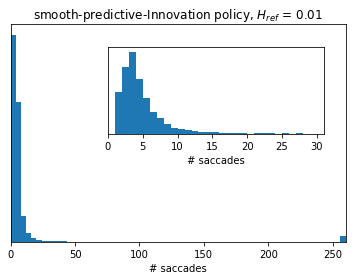

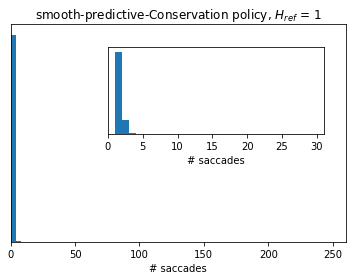

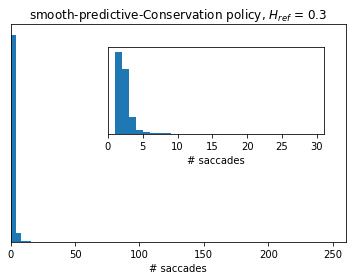

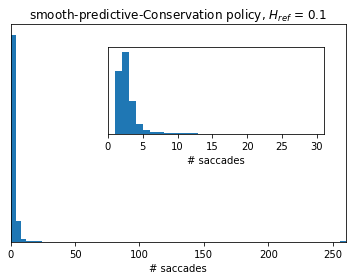

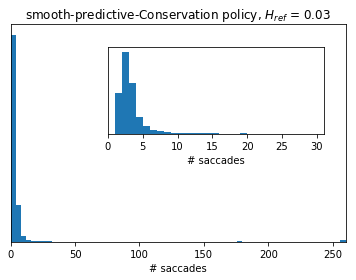

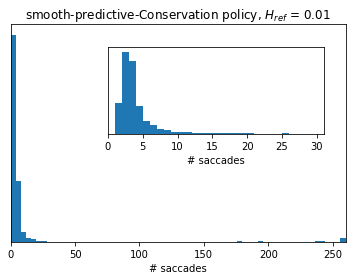

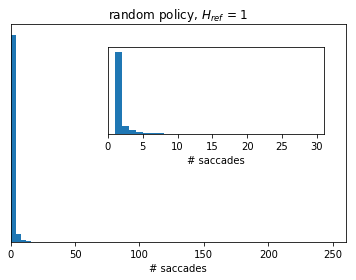

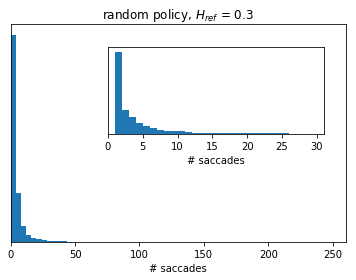

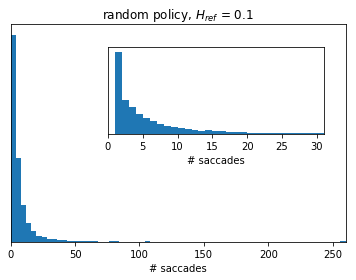

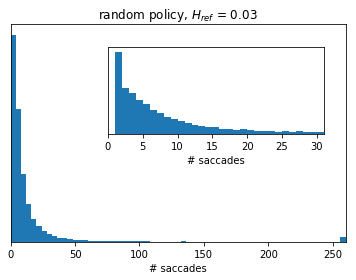

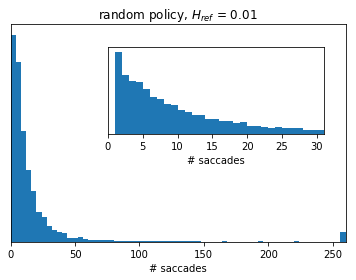

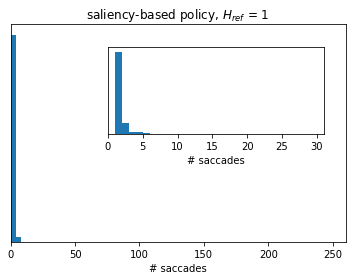

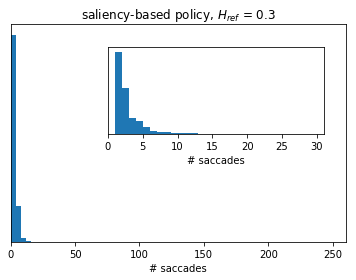

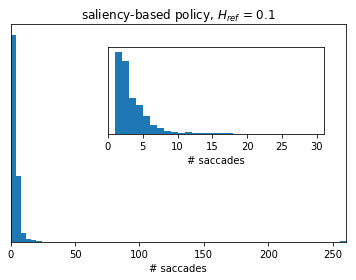

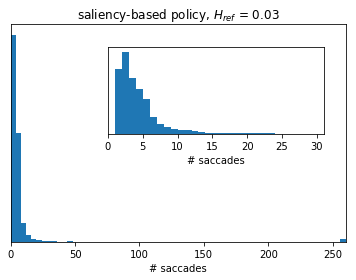

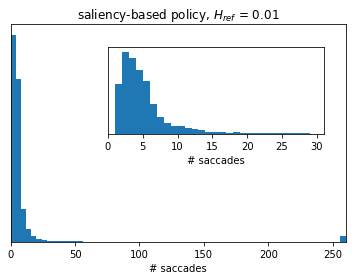

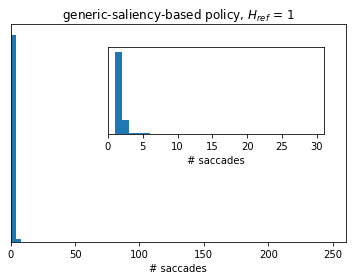

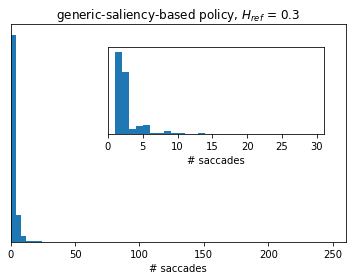

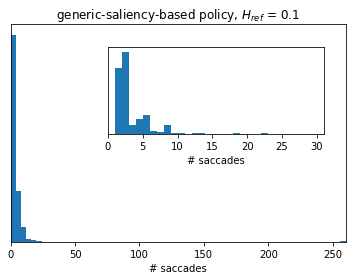

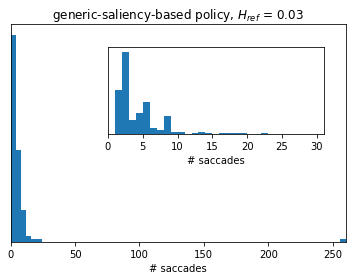

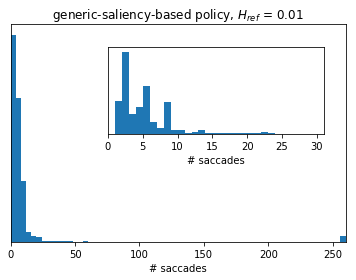

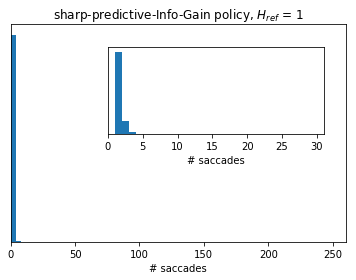

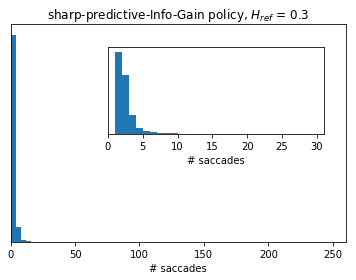

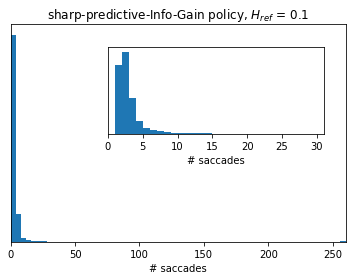

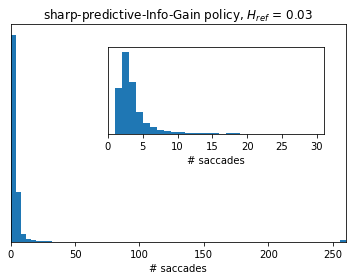

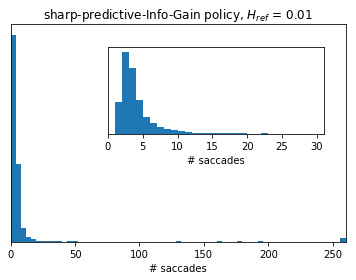

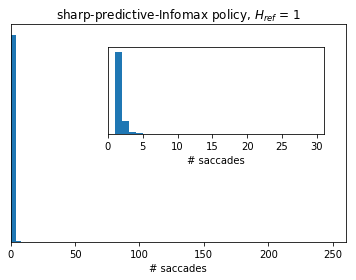

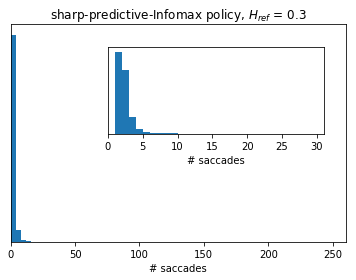

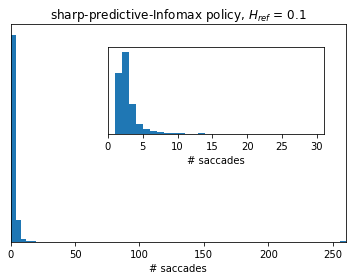

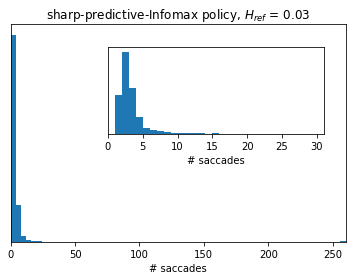

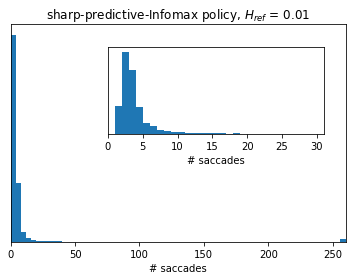

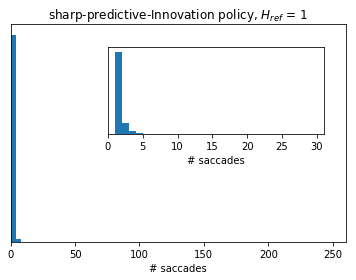

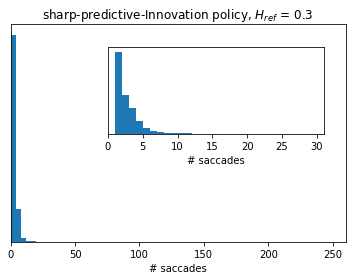

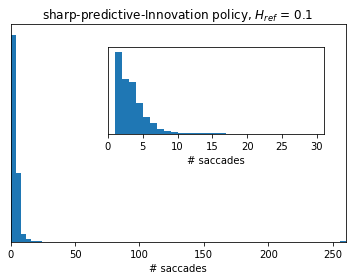

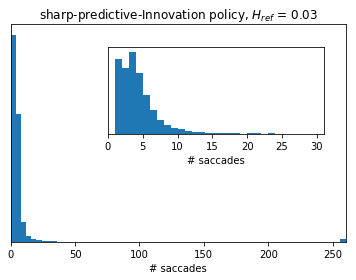

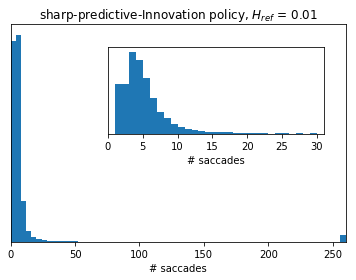

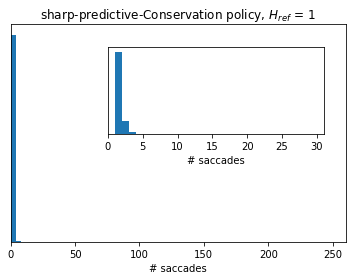

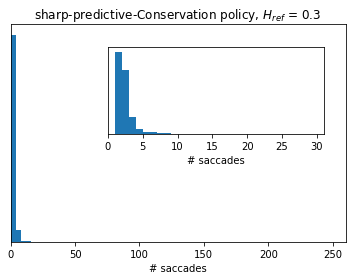

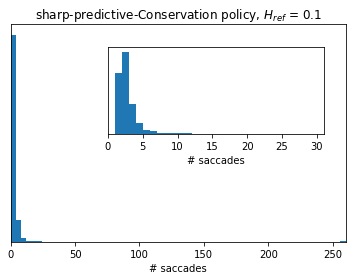

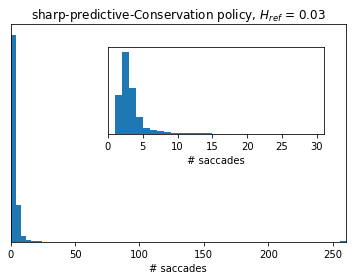

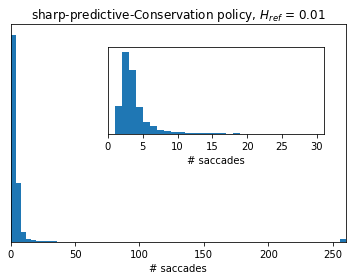

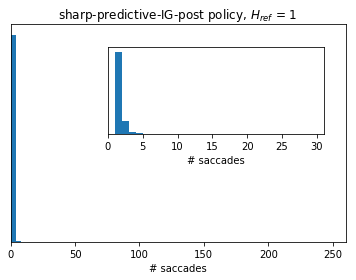

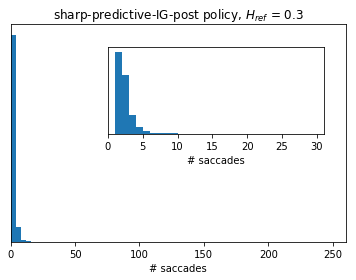

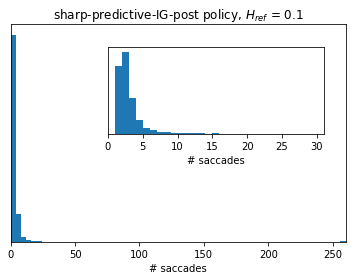

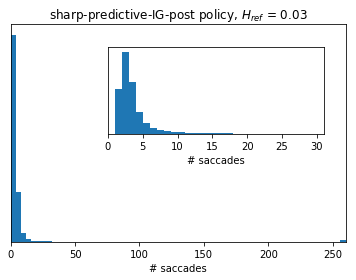

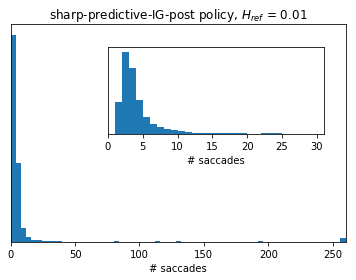

In [8]:
#for POL in ('predictive', 'predictive-dual', 'predictive-KL', 'FEP-predictive', 'FEP-predictive-dual', 'FEP-predictive-KL',  'saliency-based', 'generic-saliency-based', 'random'): #): #: #', ' ):
for POL in liste_pol:
    mem_classif_rate[POL] = []
    mem_mem_saccades[POL] = []
    mem_mem_compression_rate[POL] = []
    
    for THRESHOLD in liste_thresholds:
        classif_rate, mem_saccades, mem_compression_rate = affiche_records(dict_records[POL][THRESHOLD], liste_NB_TRIALS)
        mem_classif_rate[POL] += [classif_rate]
        mem_mem_saccades[POL] += [mem_saccades]
        mem_mem_compression_rate[POL] += [mem_compression_rate]

Policy : predictive-dual
Threshold : 1
classif rate : 61.6
nb_saccades : 4.125
nb_coeffs : 47.643
compression rate : 93.9230867347
final posterior : 0.796156613211
final entropy : 0.667606989425


Policy : predictive-dual
Threshold : 0.7
classif rate : 67.8
nb_saccades : 7.825
nb_coeffs : 70.02
compression rate : 91.068877551
final posterior : 0.876600975014
final entropy : 0.455195535209


Policy : predictive-dual
Threshold : 0.5
classif rate : 70.0
nb_saccades : 13.705
nb_coeffs : 97.323
compression rate : 87.5863520408
final posterior : 0.916586927384
final entropy : 0.332730806813


Policy : predictive-dual
Threshold : 0.3
classif rate : 70.6
nb_saccades : 34.809
nb_coeffs : 182.721
compression rate : 76.69375
final posterior : 0.934196505437
final entropy : 0.241143779973


Policy : predictive-dual
Threshold : 0.2
classif rate : 69.9
nb_saccades : 43.896
nb_coeffs : 219.471
compression rate : 72.00625
final posterior : 0.946281379985
final entropy : 0.187797088061

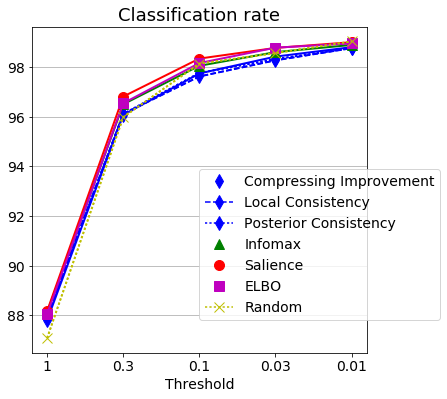

In [9]:
f = plt.figure(figsize = (6, 6))
NB_THRESHOLDS = 5

for i, POL in enumerate(liste_pol[:7]):
    plt.plot(np.arange(NB_THRESHOLDS), mem_classif_rate[POL], liste_col[i], lw=2)
    plt.plot(np.arange(NB_THRESHOLDS), mem_classif_rate[POL], liste_col[i]+liste_dot[i], label = liste_lab[i], ms = 10)
#plt.plot([-.1,4.1], [mem_classif_rate['full'][0]] * 2, 'r--', label = 'exhaustive scan', lw=2)
plt.legend(loc = (.5,.1), fontsize = 14)
plt.title('Classification rate', fontsize = 18)
plt.xlabel('Threshold', fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('1e-1', '1e-2', '1e-3', '1e-4', '1e-5'), fontsize = 14)
plt.xticks(np.arange(NB_THRESHOLDS), liste_thresholds, fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('2', '1.5', '1', '7e-1', '5e-1', '3e-1', '2e-1', '1e-1'), fontsize = 14)
plt.yticks(fontsize = 14)
#plt.xlim([-.2,4.2])
#plt.ylim([70, 100])
f.gca().yaxis.grid(True)
#plt.savefig('FEP-CNN-classif.png')
plt.savefig(nom_fic+'-nips-classif.png')



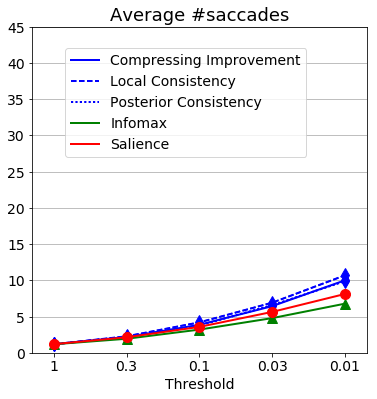

In [10]:
plt.figure(figsize = (6, 6))
axe = plt.subplot(1,1,1)
#liste_col = ['b', 'g', 'r','m','k','y','y--', 'y:','b:', 'g:', 'r:','m:','k:']
#liste_pol = ['H1-FEP', 'Dual-FEP', 'Infomax',  'Random']
#liste_pol =  ['IG', 'Infomax + BS', 'Infomax',  'Random']

for i, POL in enumerate(liste_pol[:5]):
    plt.plot(np.arange(NB_THRESHOLDS), np.mean(np.array(mem_mem_saccades[POL]), 1), liste_col[i], label = liste_lab[i], lw = 2)
    plt.plot(np.arange(NB_THRESHOLDS), np.mean(np.array(mem_mem_saccades[POL]), 1), liste_col[i]+liste_dot[i], ms = 10)
    '''asymmetric_error = [np.zeros(5), np.std(np.array(mem_mem_saccades[POL]), 1)]
    plt.errorbar(np.arange(5) + .02 * (i - 1), \
                 np.mean(np.array(mem_mem_saccades[POL]), 1), \
                 yerr = asymmetric_error, \
                 marker = '', \
                 color = liste_col[i],
                 linestyle = 'None')'''
plt.legend(loc = (.1,.6), fontsize = 14)
plt.title('Average #saccades', fontsize = 18)
plt.xlabel('Threshold', fontsize = 14)
plt.xticks(np.arange(5), liste_thresholds, fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('1', '3e-1', '1e-1', '3e-2', '1e-2'), fontsize = 14)
plt.yticks(fontsize = 14)
#plt.xlim([-.2,4.2])
plt.xlim([-.3,4.3])
axe.yaxis.grid(True)
plt.ylim([0, 45])    
#axe.set_yscale('log')
plt.savefig(nom_fic+'saccades.png')




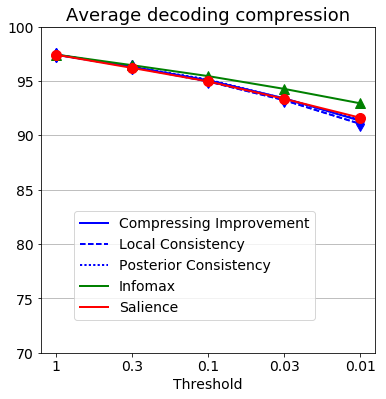

In [11]:
f = plt.figure(figsize = (6, 6))

axe = plt.subplot(1,1,1)
#liste_col = ['b', 'g', 'r','m','k','y','y--', 'y:','b:', 'g:', 'r:','m:','k:']
#liste_pol = ['H1-FEP', 'Dual-FEP', 'Infomax',  'Random']
for i, POL in enumerate(liste_pol[:5]):
    plt.plot(np.arange(NB_THRESHOLDS), np.mean(np.array(mem_mem_compression_rate[POL]), 1), \
             liste_col[i], label = liste_lab[i], lw = 2)
    plt.plot(np.arange(NB_THRESHOLDS), np.mean(np.array(mem_mem_compression_rate[POL]), 1), \
             liste_col[i]+liste_dot[i], ms = 10)
plt.legend(loc = (.1,.1), fontsize = 14)
plt.title('Average decoding compression', fontsize = 18)
plt.xlabel('Threshold', fontsize = 14)
plt.xticks(np.arange(NB_THRESHOLDS), liste_thresholds, fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('1', '3e-1', '1e-1', '3e-2', '1e-2'), fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('2', '1.5', '1', '7e-1', '5e-1', '3e-1', '2e-1', '1e-1'), fontsize = 14)
#plt.xlim([-.2,4.2])
plt.ylim([70, 100])
plt.yticks(fontsize = 14)
axe.yaxis.grid(True)

plt.savefig(nom_fic+'-nips-compression.png')


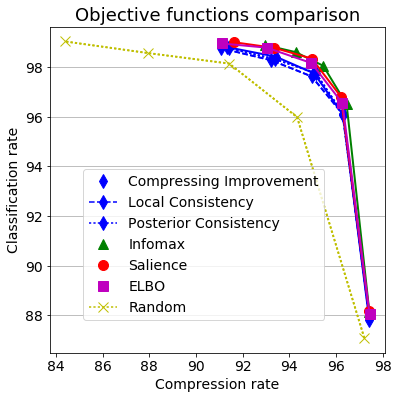

In [12]:
f = plt.figure(figsize = (6, 6))
NB_THRESHOLDS = 5

for i, POL in enumerate(liste_pol[:7]):
    plt.plot(np.mean(np.array(mem_mem_compression_rate[POL]), 1), mem_classif_rate[POL], liste_col[i], lw=2)
    plt.plot(np.mean(np.array(mem_mem_compression_rate[POL]), 1), mem_classif_rate[POL], liste_col[i]+liste_dot[i], label = liste_lab[i], ms = 10)
#plt.plot([-.1,4.1], [mem_classif_rate['full'][0]] * 2, 'r--', label = 'exhaustive scan', lw=2)
plt.legend(loc = (.1,.1), fontsize = 14)
plt.title('Objective functions comparison', fontsize = 18)
plt.xlabel('Compression rate', fontsize = 14)
plt.ylabel('Classification rate', fontsize = 14)

#plt.xticks(np.arange(NB_THRESHOLDS), ('1e-1', '1e-2', '1e-3', '1e-4', '1e-5'), fontsize = 14)
plt.xticks(fontsize = 14)
#plt.xticks(np.arange(NB_THRESHOLDS), ('2', '1.5', '1', '7e-1', '5e-1', '3e-1', '2e-1', '1e-1'), fontsize = 14)
plt.yticks(fontsize = 14)
#plt.xlim([-.2,4.2])
#plt.ylim([70, 100])
f.gca().yaxis.grid(True)
#plt.savefig('FEP-CNN-classif.png')
plt.savefig(nom_fic+'-nips-classif-corrected-scale-up.png')

